## 1. Import the necessary libraries

In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import import_ipynb
from data_process import remove_punctuation,remove_stopword
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from pyvi import ViTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

>Read CSV

In [98]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [99]:
X_train,y_train = ReadData("../data/mobile_feedback/Cleaned_Train.csv")
X_test,y_test=ReadData("../data/mobile_feedback/Cleaned_Test.csv")

In [100]:
print(X_test[128])

quá ngon quá đẹp đc trải nghiệm hôm_nay mọi người phân_vân tầm 5990000 ngon hơn oppo realme vivo


In [101]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(7786,)
y_train size (7786,)


> word separation

In [102]:
def wordseparation(comment):
    return [review.split() for review in comment]

> Execute function

In [103]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['mới', 'mua', 'máy', 'thegioididong', 'thốt_nốt', 'cảm_thấy', 'ok', 'bin', 'trâu', 'chụp', 'ảnh', 'đẹp', 'loa', 'nghe', 'to', 'bắt', 'wf', 'khỏe_sóng', 'ổn_định', 'giá_thành', 'túi_tiền', 'nhân_viên', 'tư_vấn', 'nhiệt_tình'], ['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


>Create  Corpus

In [104]:
def CreateCorpus(Vi):
    tokenizer=Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(Vi)
    return tokenizer

> Execute function

In [105]:
X_train_corpus=CreateCorpus(X_train)
X_test_corpus=CreateCorpus(X_test)
print(X_train_corpus.word_index)
print(X_test_corpus.word_index)

{'<oov>': 1, 'máy': 2, 'mua': 3, 'pin': 4, 'mình': 5, 'game': 6, 'dùng': 7, 'mới': 8, 'tốt': 9, 'chơi': 10, 'ko': 11, 'quá': 12, 'ok': 13, 'giá': 14, '1': 15, 'đẹp': 16, 'mượt': 17, 'nhanh': 18, 'sạc': 19, 'ngày': 20, 'ổn': 21, 'camera': 22, 'còn': 23, 'chụp': 24, 'thấy': 25, 'tầm': 26, 'xài': 27, 'hơn': 28, 'k': 29, 'về': 30, 'màn_hình': 31, 'trâu': 32, 'trong': 33, 'hơi': 34, 'đc': 35, 'khá': 36, 'sản_phẩm': 37, '2': 38, 'lỗi': 39, 'tay': 40, 'tháng': 41, 'sao': 42, 'hay': 43, 'nhân_viên': 44, 'mọi': 45, 'sử_dụng': 46, 'con': 47, 'hình': 48, 'sài': 49, 'hết': 50, 'vân': 51, 'nói_chung': 52, 'nhiệt_tình': 53, 'ngon': 54, 'thứ': 55, 'nóng': 56, 'lắm': 57, '3': 58, 'nghe': 59, 'nó': 60, 'loa': 61, 'luôn': 62, 'điện_thoại': 63, 'khác': 64, 'tệ': 65, 'lag': 66, 'ảnh': 67, 'người': 68, 'wifi': 69, 'xem': 70, 'mấy': 71, 'ở': 72, 'nào': 73, 'biết': 74, 'bạn': 75, 'lần': 76, 'cấu_hình': 77, 'dc': 78, 'đổi': 79, 'nói': 80, 'hàng': 81, 'sáng': 82, 'tôi': 83, 'đt': 84, 'tuần': 85, 'đơ': 86, 'đến

In [106]:
print(f"Total Word in Corpus of train: ({len(X_train_corpus.word_index)})")
print(f"Total Word in Corpus of test: ({len(X_test_corpus.word_index)})")

Total Word in Corpus of train: (11622)
Total Word in Corpus of test: (5352)


> longest sentence in the training set, longest sentence in the test set

In [107]:
max_sentence_Xtrain= max([len(i) for i in  (X_train)])
print(f"max_sentence_Xtrain:{max_sentence_Xtrain} word")
max_sentence_Xtest=max([len(i) for i in (X_test)])
print(f"max_sentence_Xtest:{max_sentence_Xtest} word")

max_sentence_Xtrain:129 word
max_sentence_Xtest:130 word


> Generate input training data by converting words to indexes and performing padding to bring into the model

In [108]:
def Padding(Vi):
    vi_sequence=X_train_corpus.texts_to_sequences(Vi)
    vi_sequence=pad_sequences(vi_sequence,maxlen=max_sentence_Xtest,padding='pre')
    return vi_sequence

> Execute Function

In [109]:
X_train=Padding(X_train)
X_test=Padding(X_test)
print(X_train[0])
print(X_test[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    8    3    2  958 4652  157
   13  302   32   24   67   16   61   59  133  102  685 3322  172  959
  526   44  113   53]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

>Convert labels to numbers

In [110]:
label_encoder=LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[2 1 0]


>Convert number to one_hot_vector

In [111]:
y_train_one_hot=to_categorical(y_train_encoded)
print(y_train_one_hot[0:3])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## 3.Built Model LSTM

### 3.1. Design configuration for LSTM network

In [112]:
dropout=0.3
total_word=len(X_train_corpus.word_index)
num_classes=3
embedding_size = 128
num_lstm_units = 15
epochs=28

### 3.2. Model LSTM

In [113]:
model = Sequential()
model.add(Embedding(total_word, embedding_size, name='embedding_layer'))
model.add(LSTM(num_lstm_units, return_sequences=True,name='LSTM_layer_1'))
model.add(Dropout(dropout,name='Dropout_layer_1'))
model.add(LSTM(num_lstm_units,name='LSTM_layer_2'))
model.add(Dense(num_classes, activation='softmax'))

### 3.3. Hyperparameter

In [114]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 3.4. Train

 >Monitor the trainning process to stop earlier

In [115]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=4,          
    restore_best_weights=True  
)

In [116]:
model.fit(X_train, 
          y_train_one_hot, 
          verbose=1, epochs=epochs,
          batch_size=32,
          callbacks=[early_stopping_callback] )

Epoch 1/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.6413 - loss: 0.8115
Epoch 2/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.8443 - loss: 0.4258
Epoch 3/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.8799 - loss: 0.3155
Epoch 4/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.9165 - loss: 0.2420
Epoch 5/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9427 - loss: 0.1790
Epoch 6/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9551 - loss: 0.1401
Epoch 7/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9683 - loss: 0.1041
Epoch 8/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.9670 - loss: 0.1011
Epoch 9/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9812 - loss: 0.0707
Epoch 10/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9849 - loss: 0.0609
Epoch 11/25
244/244 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9868 - loss: 0.0531
Epoch 12/25
244/244 ━━━━━━━━━━

>Network Architecture

In [117]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 130, 128)       │     1,487,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_1 (LSTM)             │ (None, 130, 15)        │         8,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_layer_1 (Dropout)       │ (None, 130, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_2 (LSTM)             │ (None, 15)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,494,494 (17.15 MB)

 Trainable params: 1,498,164 (5.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,996,330 (11.43 MB)

None


> Network Architecture Diagram

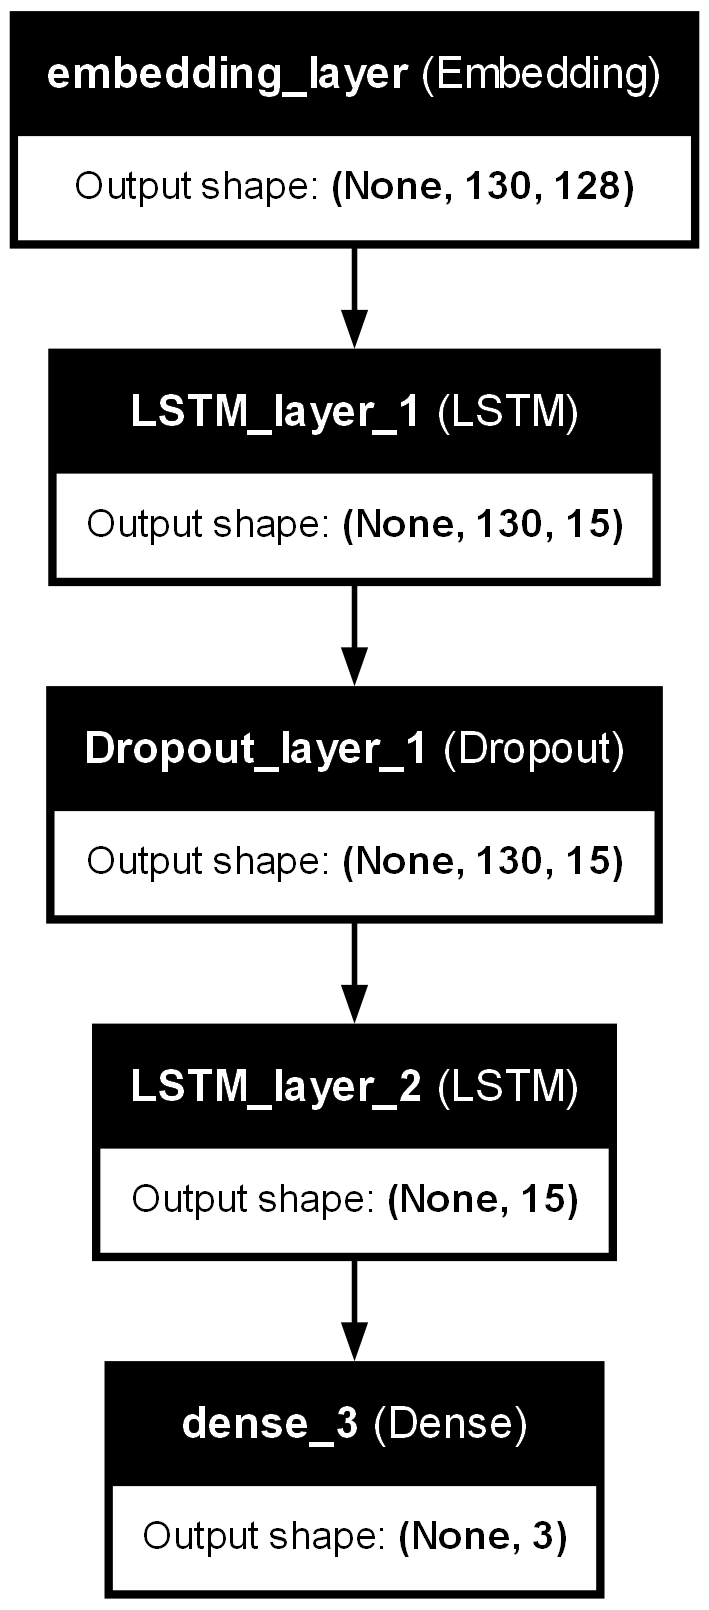

In [118]:
# Tạo đồ thị cho mô hình
plot_model(model, to_file='../Picture_Model/model_LSTM_sentiment.png', show_shapes=True, show_layer_names=True)

> Dump file models_sentiment.h5

In [119]:
model.save('../model/model_sentiment_lstm.h5')

### 3.5 Evaluation test dataset

> Load file model_sentiment_lstm.h5

In [120]:
model_sentiment=load_model("../model/model_sentiment_lstm.h5")

> Get the weight of the embedding layer

In [121]:
weights = model_sentiment.layers[0].get_weights()[0]

# Giảm chiều dữ liệu sử dụng t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(weights)
print(embeddings_2d[0:2])

[[-11.022696    22.400427  ]
 [  0.04030422  14.1847    ]]


> Visualize the context and semantic correlation of words

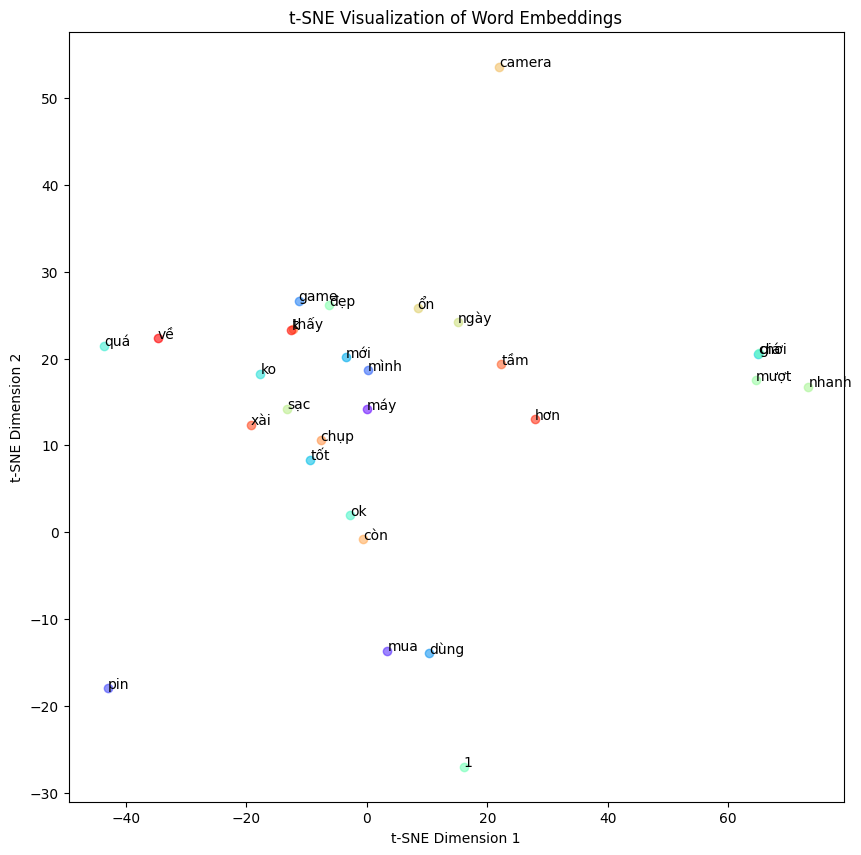

In [122]:
# Vẽ trực quan hóa với nhãn từ
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, 30))
plt.figure(figsize=(10, 10))
for i in range(1,30):  
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(X_train_corpus.index_word[i+1], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


> predict  test dataset 

In [123]:
result = model_sentiment.predict(X_test)


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [124]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[125:150])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[125:150])

[1 0 0 2 2 2 0 0 0 1 2 2 0 2 0 0 2 2 0 0 0 2 0 0 0]
['Neutral' 'Negative' 'Negative' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Negative' 'Neutral' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Negative']


> Data Preprocessing sample

In [125]:
def Proprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= remove_stopword(comment)
    comment= [ViTokenizer.tokenize(comment)]
    comment = wordseparation(comment)
    comment=Padding(comment)
    return comment

> Predict one a new sample

In [126]:
comment="Sản phẩm Sài cũng tạm thích cái camera và pin trâu. Còn đt đang sài ko biết có bạn nào giống mình ko lúc Sài ứng dụng nhưng dể một lúc thì tối  bấm hoài không lên. Để lúc mới lên  cài nhạc chuông cho điện thoại hay bị mất"
comment_processed=Proprocessing(comment)
result_one=model_sentiment.predict(comment_processed)
predict_a_label=np.argmax(result_one,axis=1)
print(predict_a_label)
print(label_encoder.inverse_transform(predict_a_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[0]
['Negative']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [127]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.7756
Precision: 0.7666
Recall: 0.7756
F1-score: 0.7702992876202415
